In [1]:
# для фильтрация wargninig
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


Атрибутивная информация:

CRIM -- Уровень преступности по городам  
ZN -- доля жилой земли, зонированной для участков площадью более 25 000 кв. м..  
INDUS -- доля нерозничного бизнеса акров в городе  
CHAS -- есть ли река рядом(бинарная переменная)  
NOX -- Концентрация оксидов азота NOX (частей на 10 млн.)  
RM -- среднее количество комнат в жилом помещении  
AGE -- Возрастная доля занятых владельцами объектов, построенных до 1940 года  
DIS -- взвешенные расстояния до пяти бостонских центров занятости  
RAD -- индекс доступности к магистралям  
TAX -- налог на полную стоимость недвижимости  
PTRATIO -- соотношение учеников и учителей по городам  
B -- доля чернокожих по городам  
LSTAT -- процент количества жителей низского статуса  

In [3]:
boston_df['Price']=boston.target
boston_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [4]:
boston_df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       Price  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [5]:
# Log transform the target for official scoring
boston_df.PriceLog = np.log1p(boston_df.Price)
y = boston_df.PriceLog

In [6]:
y.head()

0    3.218876
1    3.117950
2    3.575151
3    3.538057
4    3.616309
Name: Price, dtype: float64

In [7]:
# для преобразований таргета, пример взят отсюда https://www.kaggle.com/apapiu/regularized-linear-models (автор просил оставлять ссылку)
import seaborn as sns
from scipy.stats import skew

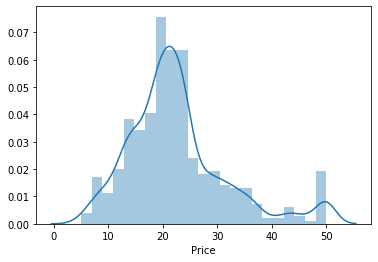

In [8]:
sns.distplot(boston_df.Price)

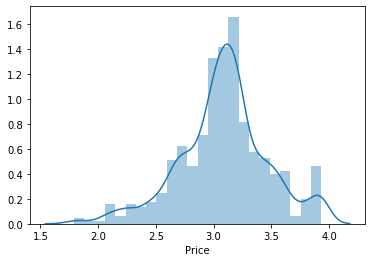

In [9]:
sns.distplot(y)

In [10]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

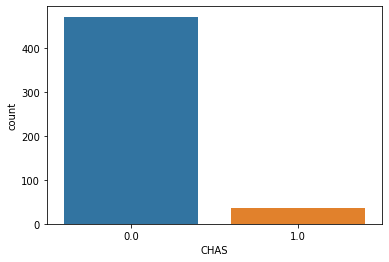

In [11]:
sns.countplot(boston_df['CHAS'])

## парные графики до трансформации

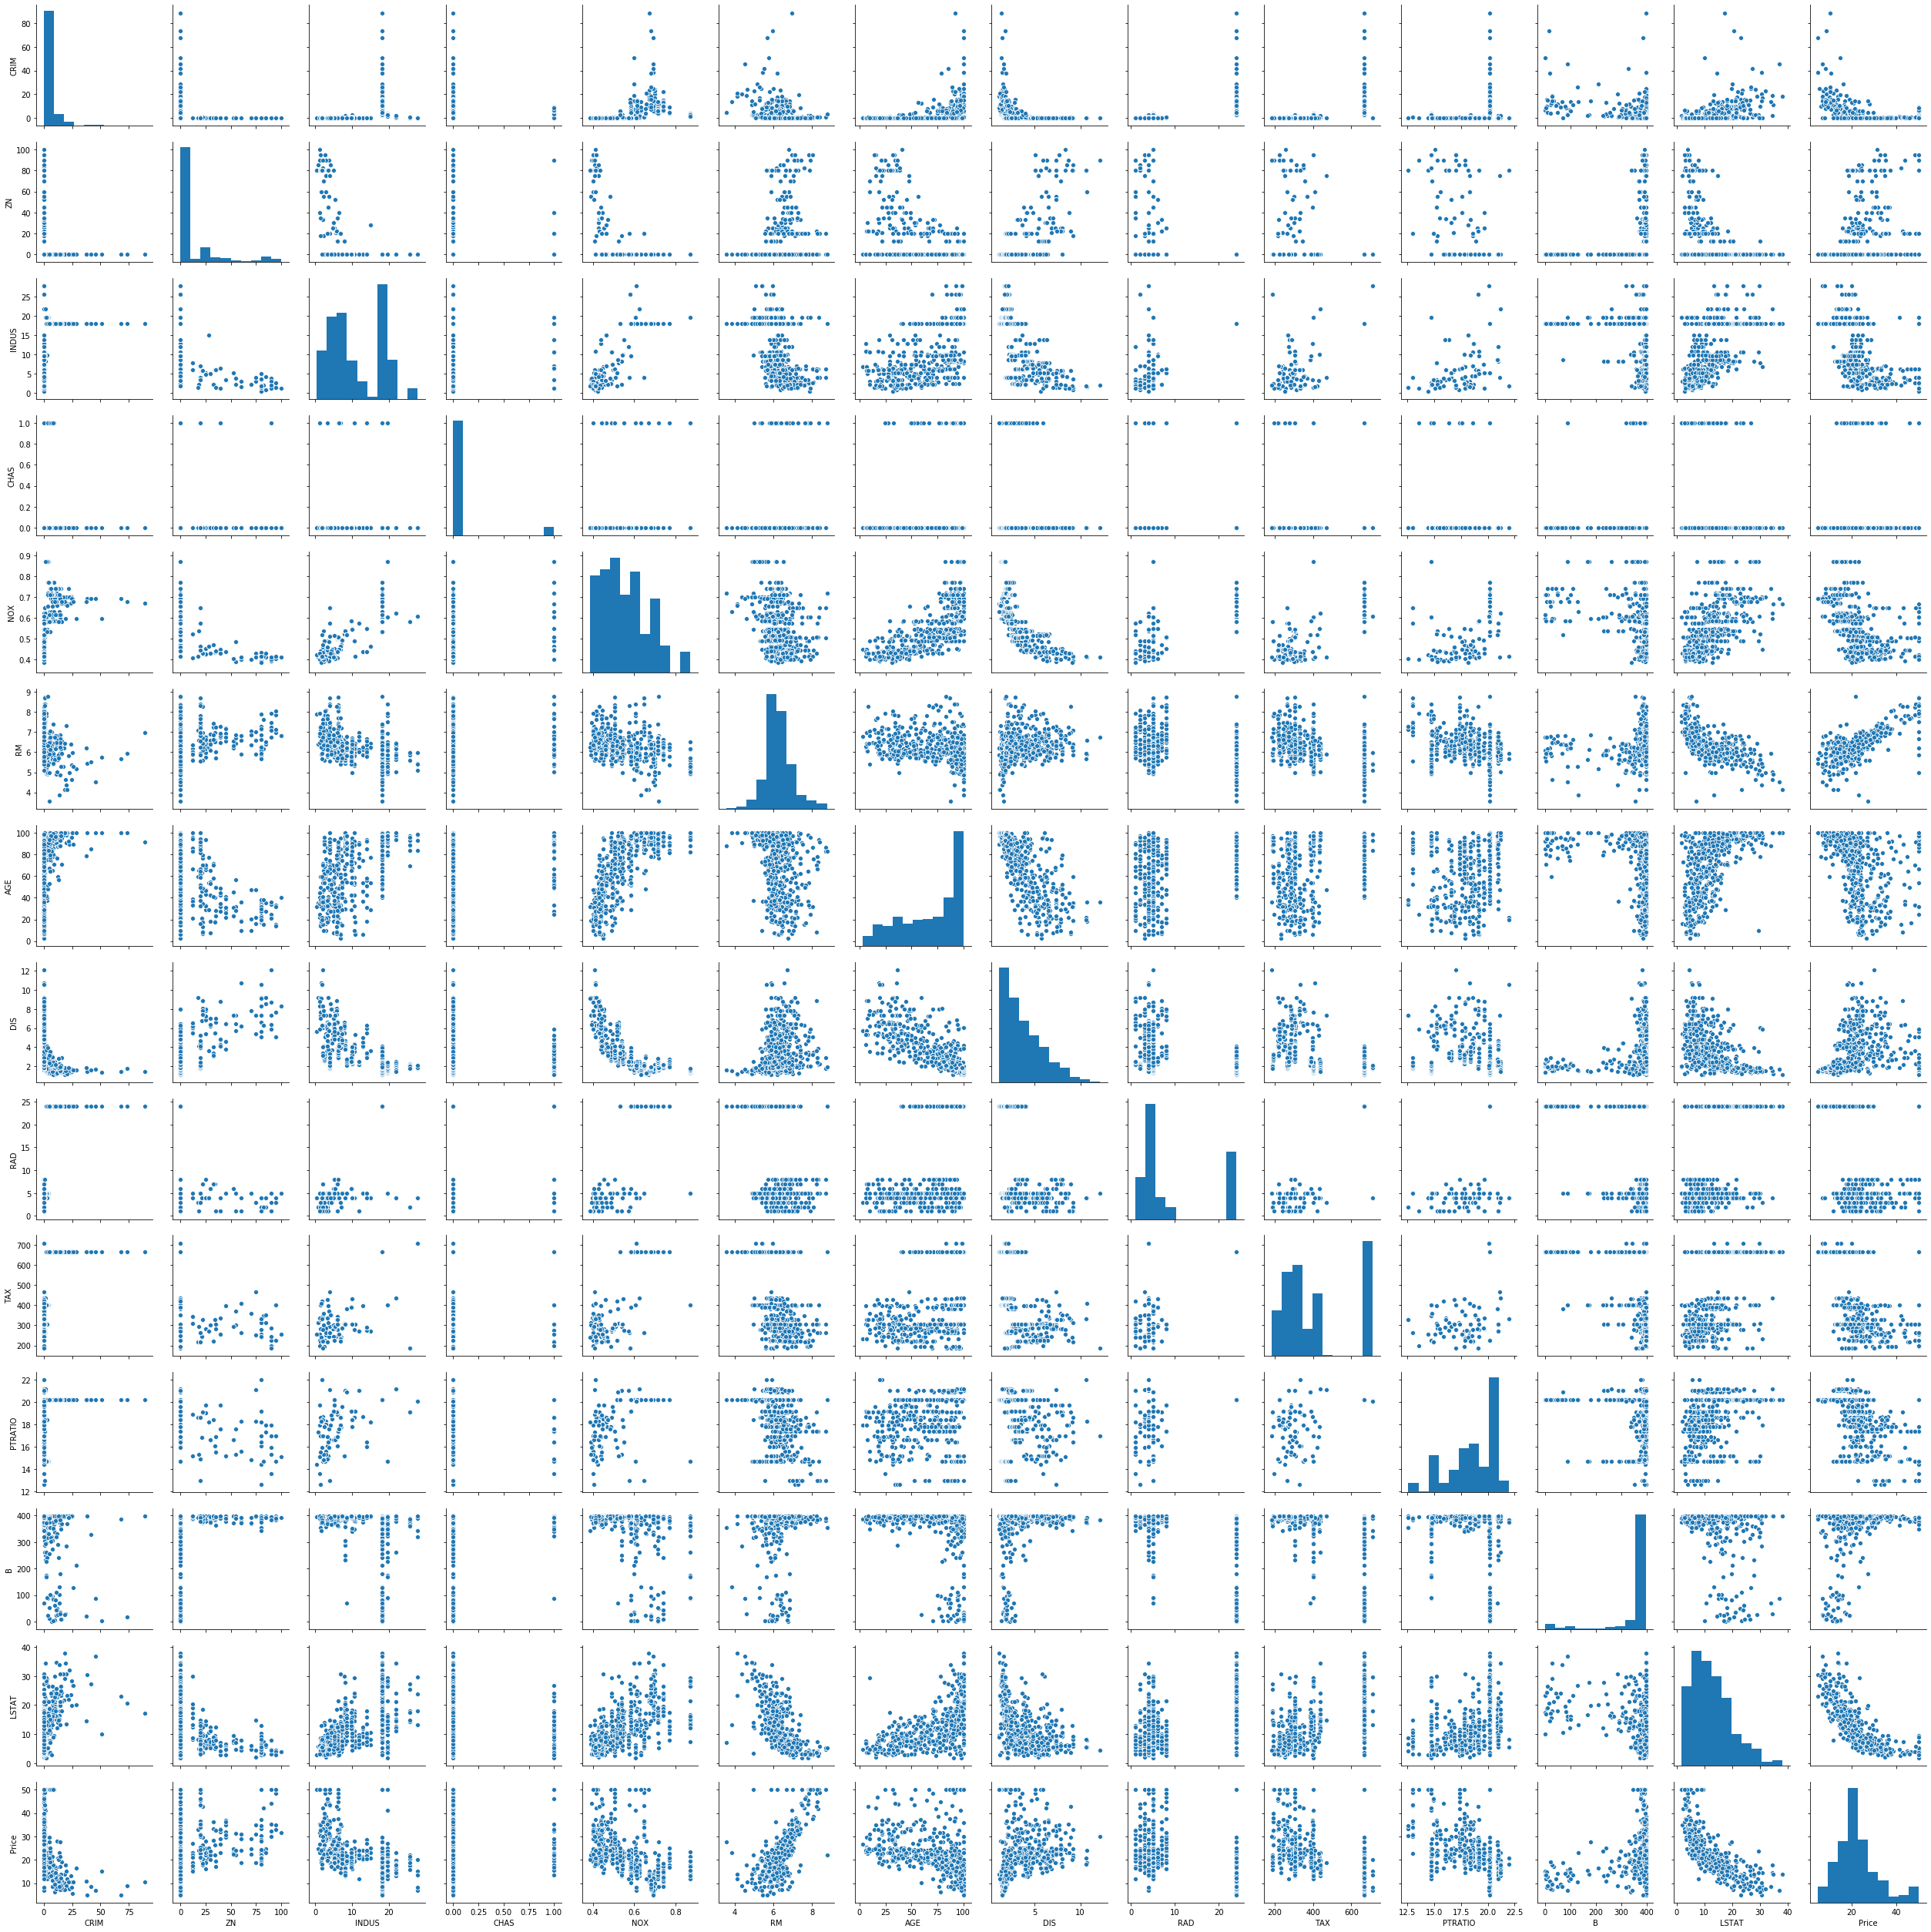

In [12]:
sns.pairplot(boston_df)

## Проведём трансформацию ассиметричных вещественных переменных

In [13]:
numeric_feats = boston_df.dtypes[boston_df.dtypes != "object"].index

skewed_feats = boston_df[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.5]
skewed_feats = skewed_feats.index

boston_df[skewed_feats] = np.log1p(boston_df[skewed_feats])

In [14]:
skewed_feats

Index(['CRIM', 'ZN', 'CHAS', 'NOX', 'DIS', 'RAD', 'TAX', 'LSTAT', 'Price'], dtype='object')

## Построим график после трансформации

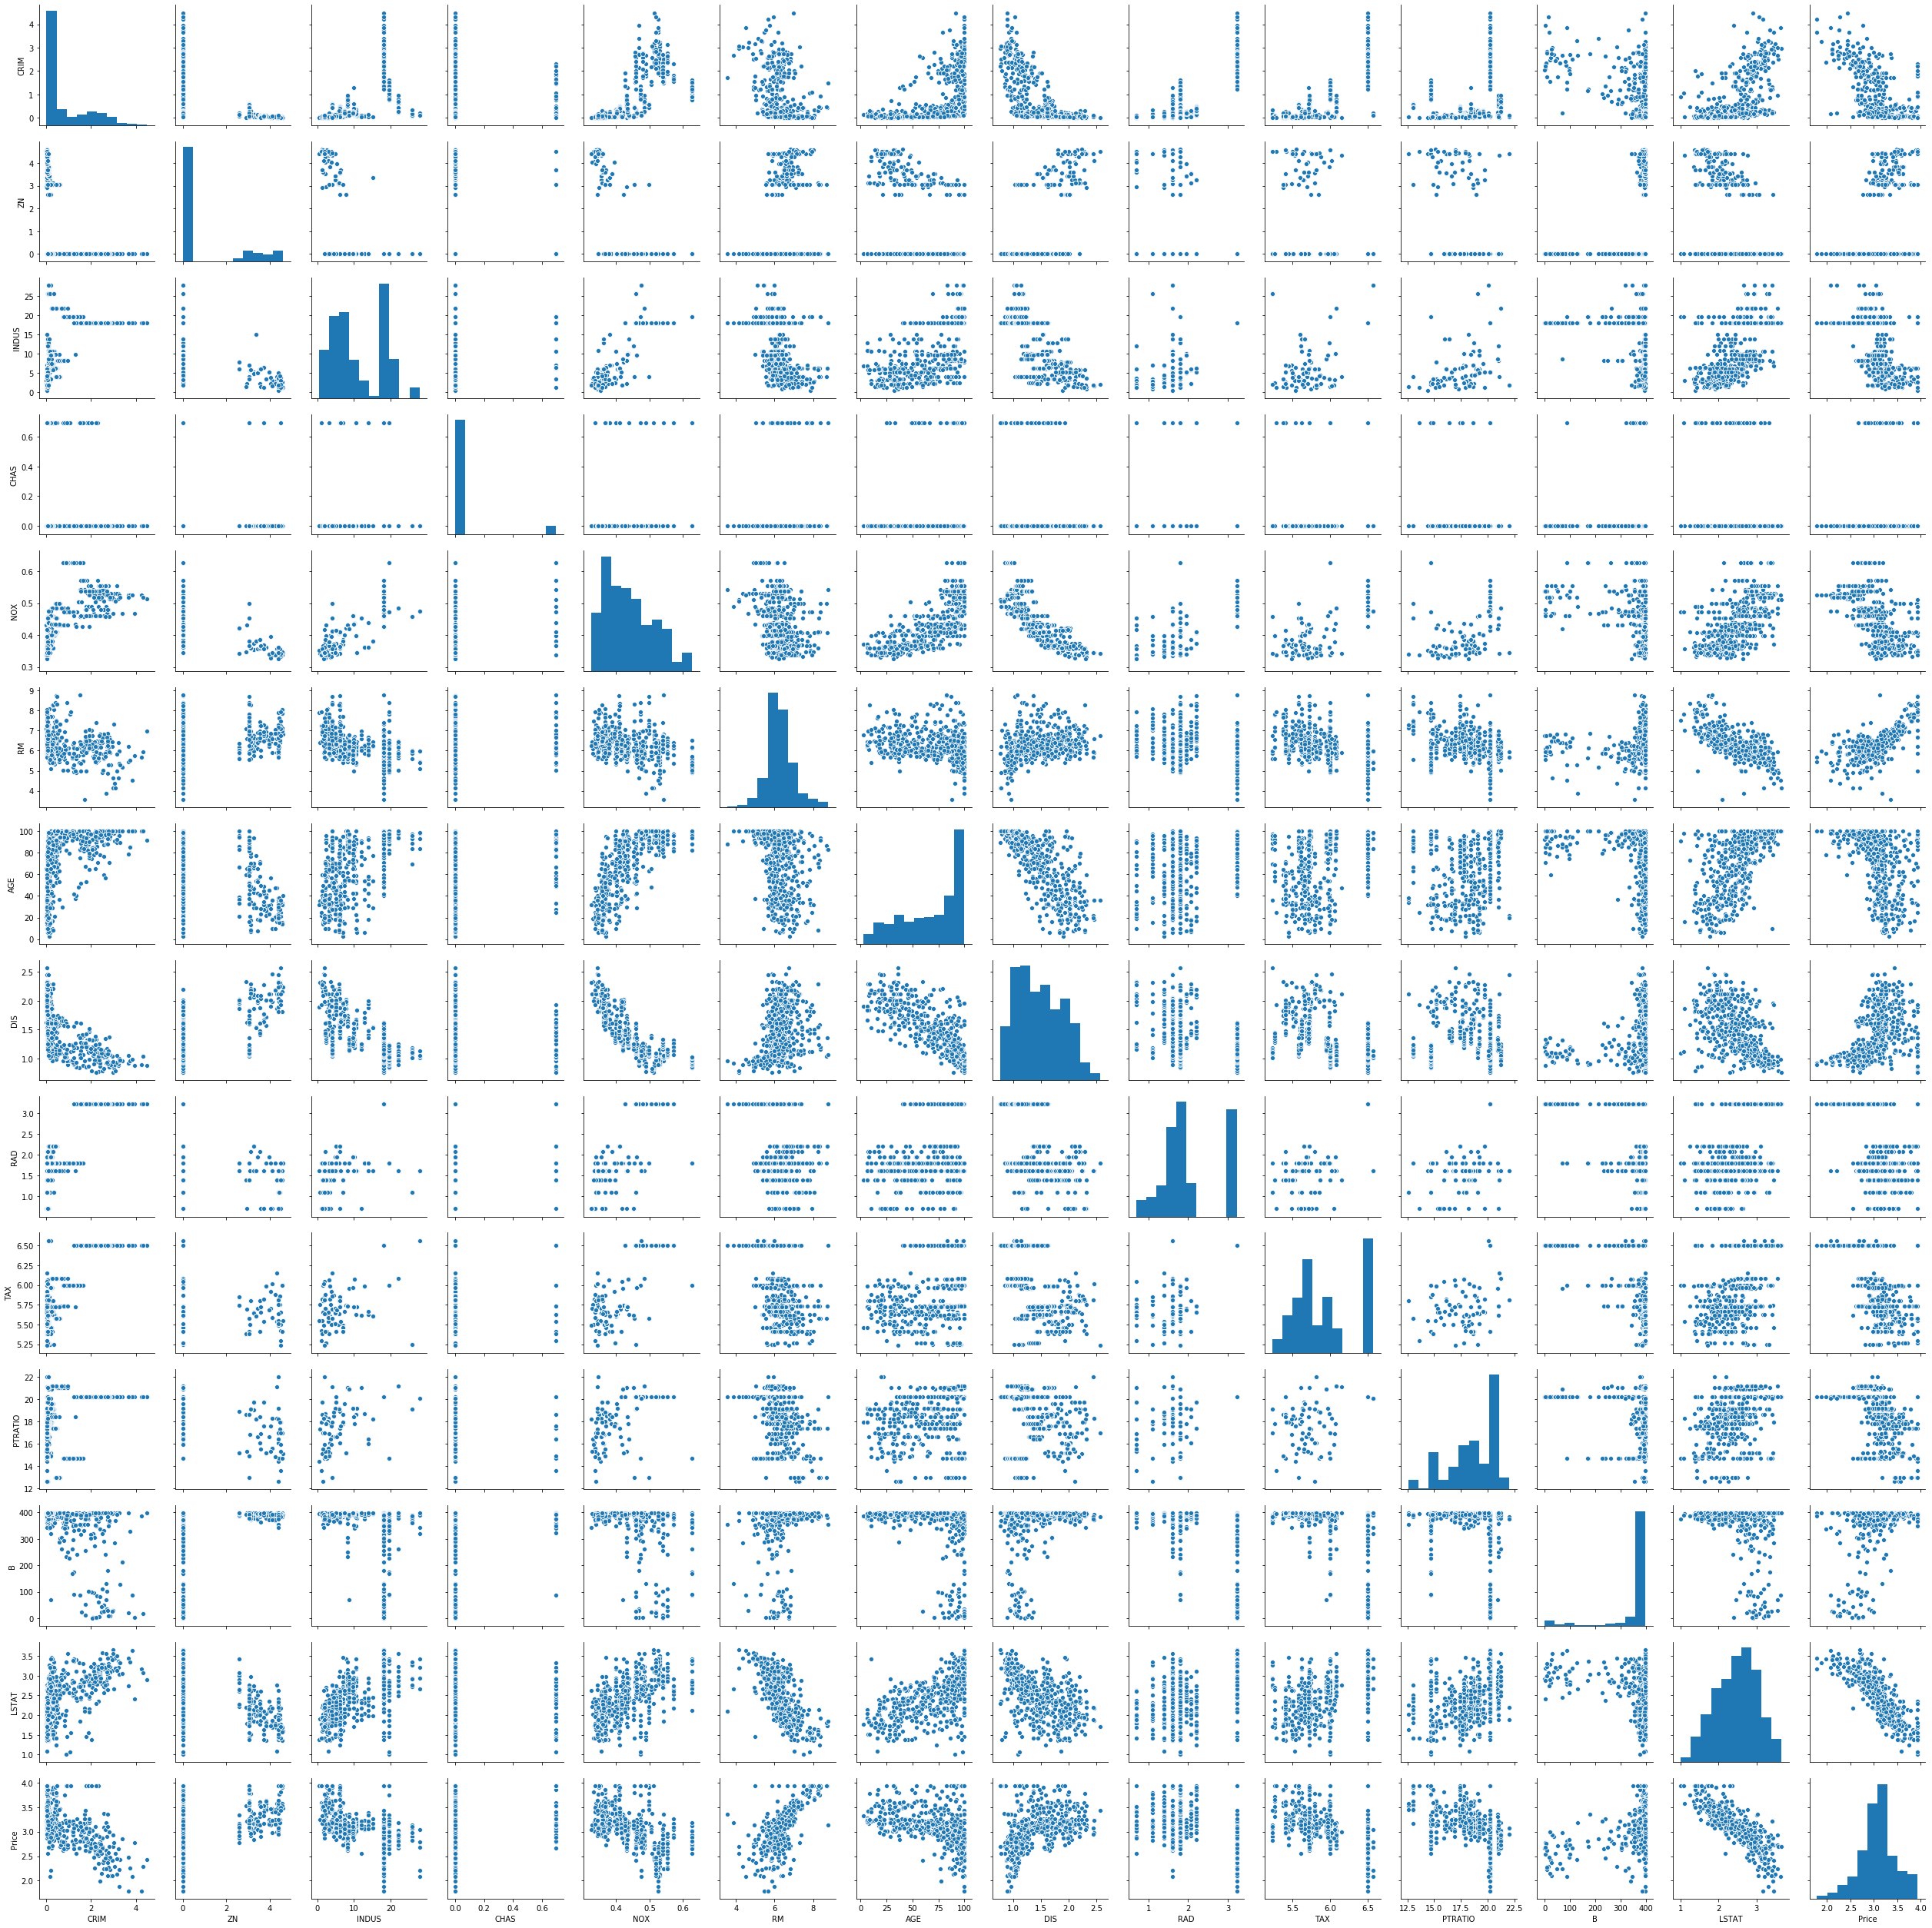

In [15]:
sns.pairplot(boston_df)

#### Можно заметить, что преобразование положительно подействовало на симметричность признаков

#### Построим корреляционную матрицу, чтобы идентифицировать те признаки, которые коррелируют с таргетом и между собой

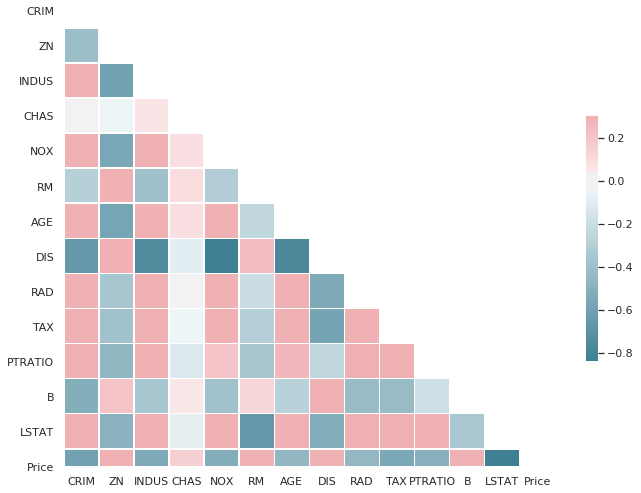

In [16]:
from string import ascii_letters

sns.set(style="white")
corr = boston_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

По графику видно, что:  
1) LSTAT наиболее сильно отрицитально коррелирует с таргетом  
2) DIS и NOX отрицительно коррелируют между собой  
3) Есть незначительные корреляции между другими признаками
                     

#### Численно построим на топ корреляций с таргетом

In [17]:
corr.sort_values(["Price"], ascending = False, inplace = True)
print(corr.Price)

Price      1.000000
RM         0.637387
B          0.400773
ZN         0.400188
DIS        0.390719
CHAS       0.159435
RAD       -0.444867
AGE       -0.452150
PTRATIO   -0.504052
NOX       -0.512006
INDUS     -0.541258
TAX       -0.555187
CRIM      -0.594500
LSTAT     -0.827465
Name: Price, dtype: float64


## видим, что многие признаки коррелируют как положительно, так и отрицательно

## проведём тестовый запуск линейной регрессии с помощью статистической библиотеки statsmodels

In [18]:
# обучим, добавив к предикторам смещение
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
ols = sm.OLS(boston_df['Price'], sm.add_constant(boston_df.drop(['Price'], axis=1)))
res = ols.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     149.7
Date:                Tue, 17 Sep 2019   Prob (F-statistic):          1.54e-161
Time:                        10:19:40   Log-Likelihood:                 167.87
No. Observations:                 506   AIC:                            -307.7
Df Residuals:                     492   BIC:                            -248.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4951      0.313     17.580      0.000       4.881       6.109
CRIM          -0.1395      0.019     -7.404      0.000      -0.177      -0.102
ZN            -0.0017      0.007     -0.226      0.821      -0.016       0.013
INDUS          0.0014      0.002      0.605      0.545      -0.003       0.006
CHAS           0.1218      0.046      2.637      0.009       0.031       0.213
NOX           -0.9345      0.243     -3.842      0.000      -1.412      -0.457
RM             0.0662      0.016      4.103      0.000       0.034       0.098
AGE            0.0006      0.001      1.168      0.243      -0.000       0.002
DIS           -0.2332      0.043     -5.408      0.000      -0.318      -0.148
RAD            0.1682      0.024      6.951      0.000       0.121       0.216
TAX           -0.1422      0.044     -3.202      0.001      -0.229      -0.055
PTRATIO       -0.0323      0.005     -6.620      0.000      -0.042      -0.023
B              0.0003      0.000      3.024      0.003       0.000       0.001
LSTAT         -0.4171      0.027    -15.623      0.000      -0.470      -0.365
==============================================================================
Omnibus:                       43.131   Durbin-Watson:                   1.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.837
Skew:                           0.153   Prob(JB):                     4.92e-43
Kurtosis:                       6.025   Cond. No.                     1.61e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### можно заметить сообщение о том, что присутствует мультиколлинеарность и отношение наибольшего собственного числа к наименьшему слишком большое

### тоже самое с помощью LinearRegression

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(n_jobs=16)

In [20]:
lr.fit(boston_df.drop('Price', axis=1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=16, normalize=False)

In [21]:
pd.DataFrame(np.concatenate((lr.coef_, np.array([lr.intercept_]))).reshape(1,14), columns=list(boston.feature_names)+['const'], index=(0,))

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.139495 -0.001658  0.001352  0.121775 -0.934533  0.066174  0.000596   

        DIS       RAD       TAX  PTRATIO         B     LSTAT     const  
0 -0.233192  0.168228 -0.142224 -0.03228  0.000307 -0.417119  5.495068

## видим, что коэффициенты совпадают с точностью до смещения
## далее будем рабоать с моделями из библиотеки scikit-learn

In [22]:
boston_df.head()

CRIM        ZN  INDUS  CHAS       NOX     RM   AGE       DIS       RAD  \
0  0.006300  2.944439   2.31   0.0  0.430483  6.575  65.2  1.627278  0.693147   
1  0.026944  0.000000   7.07   0.0  0.384582  6.421  78.9  1.786261  1.098612   
2  0.026924  0.000000   7.07   0.0  0.384582  7.185  61.1  1.786261  1.098612   
3  0.031857  0.000000   2.18   0.0  0.377066  6.998  45.8  1.954757  1.386294   
4  0.066770  0.000000   2.18   0.0  0.377066  7.147  54.2  1.954757  1.386294   

        TAX  PTRATIO       B     LSTAT     Price  
0  5.693732     15.3  396.90  1.788421  3.218876  
1  5.493061     17.8  396.90  2.316488  3.117950  
2  5.493061     17.8  392.83  1.615420  3.575151  
3  5.407172     18.7  394.63  1.371181  3.538057  
4  5.407172     18.7  396.90  1.845300  3.616309

In [23]:
X = boston_df.drop('Price',axis=1)
Y = boston_df['Price']

In [24]:
X.head()

CRIM        ZN  INDUS  CHAS       NOX     RM   AGE       DIS       RAD  \
0  0.006300  2.944439   2.31   0.0  0.430483  6.575  65.2  1.627278  0.693147   
1  0.026944  0.000000   7.07   0.0  0.384582  6.421  78.9  1.786261  1.098612   
2  0.026924  0.000000   7.07   0.0  0.384582  7.185  61.1  1.786261  1.098612   
3  0.031857  0.000000   2.18   0.0  0.377066  6.998  45.8  1.954757  1.386294   
4  0.066770  0.000000   2.18   0.0  0.377066  7.147  54.2  1.954757  1.386294   

        TAX  PTRATIO       B     LSTAT  
0  5.693732     15.3  396.90  1.788421  
1  5.493061     17.8  396.90  2.316488  
2  5.493061     17.8  392.83  1.615420  
3  5.407172     18.7  394.63  1.371181  
4  5.407172     18.7  396.90  1.845300

## Среднее

In [25]:
X.mean()

CRIM         0.813418
ZN           0.953873
INDUS       11.136779
CHAS         0.047945
NOX          0.438587
RM           6.284634
AGE         68.574901
DIS          1.479648
RAD          2.054483
TAX          5.934259
PTRATIO     18.455534
B          356.674032
LSTAT        2.475610
dtype: float64

### Как мы видим, у некоторых признаков сильно различается масштаб, что негативно влияет как на обычную регрессию так и на регуляризированную и на любую другую линейную модель  
### Поэтому выполняем стандартизацию: $$z_i = (x - \mu) / \sigma$$

In [26]:
from sklearn.preprocessing import scale
X_scale = scale(X)

In [27]:
X_scale_df = pd.DataFrame(X_scale, columns=boston.feature_names)

In [28]:
X_scale_df.head()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.789960  1.229330 -1.287909 -0.272599 -0.111204  0.413672 -0.120013   
1 -0.769755 -0.589091 -0.593381 -0.272599 -0.741058  0.194274  0.367166   
2 -0.769774 -0.589091 -0.593381 -0.272599 -0.741058  1.282714 -0.265812   
3 -0.764946 -0.589091 -1.306878 -0.272599 -0.844197  1.016303 -0.809889   
4 -0.730775 -0.589091 -1.306878 -0.272599 -0.844197  1.228577 -0.511180   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  
0  0.357474 -1.812467 -0.609011 -1.459000  0.441052 -1.276118  
1  0.742438 -1.272635 -1.117107 -0.303094  0.441052 -0.295491  
2  0.742438 -1.272635 -1.117107 -0.303094  0.396427 -1.597382  
3  1.150436 -0.889619 -1.334579  0.113032  0.416163 -2.050937  
4  1.150436 -0.889619 -1.334579  0.113032  0.441052 -1.170492

### убедимся в изменении среднего

In [29]:
X_scale_df.mean()

CRIM       3.866034e-16
ZN        -8.394690e-16
INDUS      2.804081e-16
CHAS      -2.966446e-16
NOX        9.975551e-16
RM        -5.189086e-17
AGE       -2.650493e-16
DIS       -4.381651e-16
RAD        1.178679e-15
TAX        6.595515e-16
PTRATIO    4.493551e-16
B         -1.451408e-16
LSTAT     -1.623646e-16
dtype: float64

## проведём Lasso регрессию и визуилизируем с помощью библиотеки matplotlib

/home/dsidorenko/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[fold 0]lambda: 0.00260, score: 0.74966
[fold 1]lambda: 0.03511, score: 0.80000
[fold 2]lambda: 0.03511, score: 0.24046
[fold 3]lambda: 0.00083, score: 0.47140
[fold 4]lambda: 0.01219, score: 0.41491
Среднее lambda = 0.01716700076970904


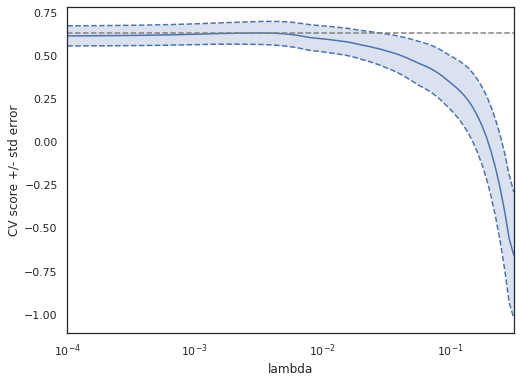

In [30]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# преобразуем в numpy array, чтобы можно было итерироваться по индексу
X_arr = np.array(X_scale_df)
y_arr = np.array(y)

# Lasso модель
lasso = Lasso(random_state=0, max_iter=10000)
# создание списка альф
alphas = np.logspace(-4, -0.5, 100)

# параметры, которые тюнятся
tuned_parameters = [{'alpha': alphas}]
# количество фолдов
n_folds = 5

# поиск оптимальных параметров на сетке полным перебором
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X_arr, y_arr)
# средний score R^2
scores = clf.cv_results_['mean_test_score']
# среднее квадратическое отклонение
scores_std = clf.cv_results_['std_test_score']
# размер фигуры
plt.figure().set_size_inches(8, 6)
# log scale для x
plt.semilogx(alphas, scores)

std_error = scores_std / np.sqrt(n_folds)
  
plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('lambda')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=0, max_iter=10000)
k_fold = KFold(5)
lasso_cv_alphas = []
for k, (train, test) in enumerate(k_fold.split(X_arr, y_arr)):
    X_tt = X_arr[train]
    y_tt = y_arr[train]
    lasso_cv.fit(X_tt, y_tt)
    lasso_cv_alphas.append(lasso_cv.alpha_)
    print("[fold {0}]lambda: {1:.5f}, score: {2:.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X_arr[test], y_arr[test])))

print(f'Среднее lambda = {np.mean(lasso_cv_alphas)}')
plt.show()

## AIC/BIC - информационные критерии для отбора параметра регуляризации
$$ \mathrm{BIC} = \mathrm{n}\ln(\frac{\mathrm{SSE}}{\mathrm{n}}) + \mathrm{k}\log(\mathrm{n}),$$ где $ \mathrm{SSE} $ - Sum of Squared Errors.  
$$ \mathrm{AIC} = 2\mathrm{k}+\mathrm{n}\ln(\sigma^2),$$ где $\mathrm{k}$ - число параметров модели

Оценка для критерия AIC = 0.0001997145970370238
Оценка для критерия BIC = 0.0017543198887440266
Вычисление lasso через покоординатный спуск...
----
Параметр регуляризации для Lasso = 0.001830493081997975
Параметр регуляризации для LassoLars = 9.118300780276195e-05


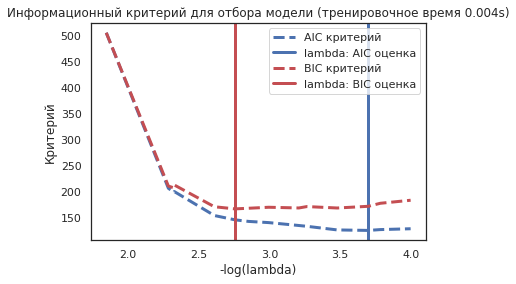

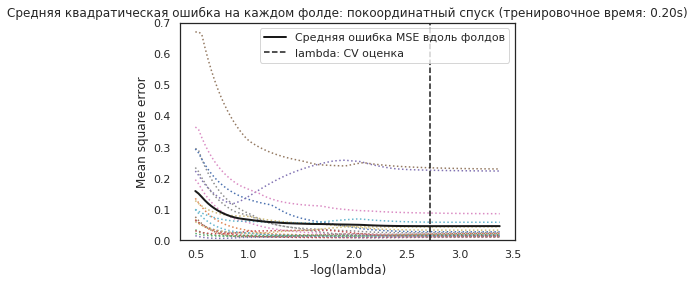

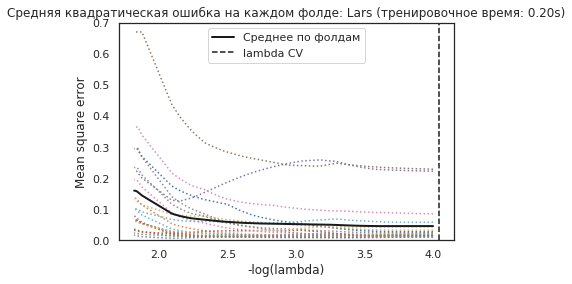

In [37]:
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC

# позволяет избежать деления на 0 при логарифмировании
EPSILON = 1e-4

# количество фолдов
cv = 20

# LassoLarsIC: least angle regression с BIC/AIC критерием

model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X_arr, y_arr)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X_arr, y_arr)
alpha_aic_ = model_aic.alpha_


def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_ + EPSILON
    alphas_ = model.alphas_ + EPSILON
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label=f'{name} критерий')
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label=f'lambda: {name} оценка')
    plt.xlabel('-log(lambda)')
    plt.ylabel('Значение критерия')
    print(f'Оценка для критерия {name} = {alpha_:.7f}')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title(f'Информационный критерий для отбора модели (тренировочное время {t_bic:.3f}s)')

# LassoCV: coordinate descent

print("Вычисление lasso через покоординатный спуск...")
t1 = time.time()
model = LassoCV(cv=cv).fit(X_arr, y_arr)
t_lasso_cv = time.time() - t1

m_log_alphas = -np.log10(model.alphas_ + EPSILON)

plt.figure()
ymin, ymax = 0, .7
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Средняя ошибка MSE вдоль фолдов', linewidth=2)
print('----')
print(f'Параметр регуляризации для Lasso = {model.alpha_}')
plt.axvline(-np.log10(model.alpha_ + EPSILON), linestyle='--', color='k',
            label='lambda: CV оценка')

plt.legend()

plt.xlabel('-log(lambda)')
plt.ylabel('Mean square error')
plt.title(f'Средняя квадратическая ошибка на каждом фолде: покоординатный спуск '
          f'(тренировочное время: {t_lasso_cv:.7f}s)')
plt.axis('tight')
plt.ylim(ymin, ymax)

# #############################################################################
# LassoLarsCV: least angle regression

t1 = time.time()
model = LassoLarsCV(cv=cv).fit(X_arr, y_arr)
t_lasso_lars_cv = time.time() - t1

m_log_alphas = -np.log10(model.cv_alphas_ + EPSILON)

plt.figure()
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Среднее по фолдам', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='lambda CV')
print(f'Параметр регуляризации для LassoLars = {model.alpha_}')
plt.legend()

plt.xlabel('-log(lambda)')
plt.ylabel('Mean square error')
plt.title('Средняя квадратическая ошибка на каждом фолде: Lars '
          f'(тренировочное время: {t_lasso_cv:.2f}s)')
plt.axis('tight')
plt.ylim(ymin, ymax)

plt.show()

## тоже самое с помощью plotly(для интерактивных графиков)

## LassoLarsIC: least angle regression with BIC/AIC criterion
## Lasso
## LassoLarsCV: покоординатный спуск

In [40]:
import plotly.graph_objs as go

import time
import numpy as np

from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets
from plotly.offline import init_notebook_mode, iplot

def data_to_plotly(coefs):
    y_ = []

    for col in range(0, len(coefs[0])):
        y_.append([ ])
        for row in range(0, len(coefs)):
            y_[col].append(coefs[row][col])
    
    return y_

model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X_arr, y_arr)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X_arr, y_arr)
alpha_aic_ = model_aic.alpha_


def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    trace1 = go.Scatter(x=-np.log10(alphas_), y=criterion_, 
                        mode='lines',
                        line=dict(color=color),
                        name=f'{name} критерий')
    
    trace2 = go.Scatter(x=2*[-np.log10(alpha_)], 
                        y=[0, 1000], #[3500, 3900]
                        mode='lines',
                        line=dict(color=color, dash='dash'),
                        name=f'lambda: {name} оценка')
    print(f'Оценка для критерия {name} = {alpha_:.7f}')
    return trace1, trace2


aic1, aic2 = plot_ic_criterion(model_aic, 'AIC', 'blue')
bic1, bic2 = plot_ic_criterion(model_bic, 'BIC', 'red')

layout = go.Layout(title=f'Информационный критерий для отбора модели (тренировочное время {t_bic}:.3fs)',
                   xaxis=dict(title='-log(lambda)', zeroline=False),
                   yaxis=dict(title='Значение критерия')
                  )
fig = go.Figure(data=[aic1, aic2, bic1, bic2], layout=layout)

init_notebook_mode()

iplot(fig)

## Lasso

t1 = time.time()
model = LassoCV(cv=20).fit(X_arr, y_arr)
t_lasso_cv = time.time() - t1

# Display results
m_log_alphas = -np.log10(model.alphas_)
ymin, ymax = 0, .7
data = []
y_ = data_to_plotly(model.mse_path_)

for i in range(0, len(y_)):
    p1 = go.Scatter(x=m_log_alphas, y=y_[i],
                    mode='lines', line=dict(dash='dot', width=1),
                    showlegend=False)
    data.append(p1)

p2 = go.Scatter(x=m_log_alphas, y=model.mse_path_.mean(axis=-1),
                mode='lines', line=dict(color='black'),
                name='Среднее вдоль фолдов')

p3 = go.Scatter(x=2*[-np.log10(model.alpha_)],
                y=[ymin, ymax],
                mode='lines', line=dict(color='black', dash='dashdot'),
                name='lambda: CV оценка')
print(f'Параметр регуляризации для Lasso = {model.alpha_:.7f}')

data.append(p2)
data.append(p3)

layout = go.Layout(title='Средняя квадратичная ошибка по каждому фолду: покоординатный спуск '
                          f'(train time: {t_lasso_cv:.2}fs)',
                   hovermode='closest',
                   xaxis=dict(title='-log(lambda)', zeroline=False),
                   yaxis=dict(title='Mean square error', zeroline=False,
                              range=[ymin, ymax])
                  )
fig = go.Figure(data=data, layout=layout)

iplot(fig)

t1 = time.time()
model = LassoLarsCV(cv=20).fit(X_arr, y_arr)
t_lasso_lars_cv = time.time() - t1

m_log_alphas = -np.log10(model.cv_alphas_)
data = []
y_ = data_to_plotly(model.mse_path_)

for i in range(0, len(y_)):
    p1 = go.Scatter(x=m_log_alphas, y=y_[i],
                    mode='lines', line=dict(dash='dot', width=1),
                    showlegend=False)
    data.append(p1)

p2 = go.Scatter(x=m_log_alphas, y=model.mse_path_.mean(axis=-1),
                mode='lines', line=dict(color='black'),
                name='Среднее по фолдам')

p3 = go.Scatter(x=2*[-np.log10(model.alpha_)],
                y=[ymin, ymax],
                mode='lines', line=dict(color='black', dash='dashdot'),
                name='lambda: CV оценка')

print(f'Параметр регуляризации для LassoLars = {model.alpha_:.7f}')

data.append(p2)
data.append(p3)

layout = go.Layout(title=f'Средняя квадратическая ошибка по каждому фолду: Lars (тренировочное время: t_lasso_lars_cv:.2fs)',
                   hovermode='closest',
                   xaxis=dict(title='-log(lambda)', zeroline=False),
                   yaxis=dict(title='Mean square error', zeroline=False,
                              range=[ymin, ymax])
                  )
fig = go.Figure(data=data, layout=layout)

iplot(fig)

Оценка для критерия AIC = 0.000
Оценка для критерия BIC = 0.002


Параметр регуляризации для LassoLars = 0.001830493081997975


## Отрисовка путей регуляризации

## Lasso and Elastic-Net Paths

In [46]:
from sklearn.linear_model import lasso_path, enet_path

# для того, чтобы не было деления на 0 при логарифмировании(присвою предыдущий EPSILON)
eps = EPSILON

print("Посчитаем путь регуляризации lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X_arr, y_arr, eps, fit_intercept=False)

print("Посчитаем путь регуляризации lasso для положительных переменных...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
    X_arr, y_arr, eps, positive=True, fit_intercept=False)
print("Посчитаем путь регуляризации elastic net...")
alphas_enet, coefs_enet, _ = enet_path(
    X_arr, y_arr, eps=eps, l1_ratio=0.8, fit_intercept=False)

print("Посчитаем путь регуляризации elastic net для положительных переменных...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X_arr, y_arr, eps=eps, l1_ratio=0.8, positive=True, fit_intercept=False)

colors = 10 * ['blue', 'red', 'green', 'cyan', 'black']

neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
data = []
i=1
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    if(i==1):
        leg=True
    else:
        leg=False
        
    l1 = go.Scatter(x=neg_log_alphas_lasso, y=coef_l, 
                    mode='lines', line=dict(color=c, width=1),
                    showlegend=leg,
                    name='Lasso')
    l2 = go.Scatter(x=neg_log_alphas_enet, y=coef_e, 
                    mode='lines', 
                    line=dict(color=c, dash='dash', width=1),
                    showlegend=leg,
                    name='Elastic-Net')
    data.append(l1)
    data.append(l2)
    i+=1

layout = go.Layout(title='Lasso and Elastic-Net Paths',
                   hovermode='closest',
                   xaxis=dict(title='-Log(lambda)'),
                   yaxis=dict(title='coefficients'))
# FIXME: посмотреть на работу этой штуки
fig.update_layout(showlegend=True)
fig = go.Figure(data=data, layout=layout)

iplot(fig)

Посчитаем путь регуляризации lasso...
Посчитаем путь регуляризации lasso для положительных переменных...
Посчитаем путь регуляризации elastic net...
Посчитаем путь регуляризации elastic net для положительных переменных...


## Lasso and positive Lasso

In [48]:
neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
data = []
i=1

for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    if(i==1):
        leg=True
    else:
        leg=False
        
    l1 = go.Scatter(x=neg_log_alphas_lasso, y=coef_l, 
                    mode='lines', line=dict(color=c, width=1),
                    showlegend=leg,
                    name='Lasso')
    l2 = go.Scatter(x=neg_log_alphas_positive_lasso, y=coef_pl, 
                    mode='lines', 
                    line=dict(color=c, dash='dash', width=1),
                    showlegend=leg,
                    name='Positive-Lasso')
    data.append(l1)
    data.append(l2)
    i+=1
    
layout = go.Layout(title='Lasso and positive Lasso',
                   hovermode='closest',
                   xaxis=dict(title='-Log(lambda)'),
                   yaxis=dict(title='coefficients'))
fig = go.Figure(data=data, layout=layout)

iplot(fig)

## Elastic-Net and Positive Elastic-Net

In [49]:
neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
data = []
i=1

for (coef_e, coef_pe, c) in zip(coefs_enet, coefs_positive_enet, colors):
    if(i==1):
        leg=True
    else:
        leg=False
        
    l1 = go.Scatter(x=neg_log_alphas_enet, y=coef_e, 
                    mode='lines', line=dict(color=c, width=1),
                    showlegend=leg,
                    name='Elastic-Net')
    l2 = go.Scatter(x=neg_log_alphas_positive_enet, y=coef_pe, 
                    mode='lines', 
                    line=dict(color=c, dash='dash', width=1),
                    showlegend=leg,
                    name='Positive elastic-Net')
    data.append(l1)
    data.append(l2)
    i+=1
    
layout = go.Layout(title='Elastic-Net and positive Elastic-Net',
                   hovermode='closest',
                   xaxis=dict(title='-Log(lambda)'),
                   yaxis=dict(title='coefficients'))
fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [51]:
n_alphas = 200
alphas = np.logspace(-10, 3, n_alphas)
# без смещения
clf = Ridge(fit_intercept=False)

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X_arr, y_arr)
    coefs.append(clf.coef_)
    
data = [ ]
y_ = []

for col in range(0, len(coefs[0])):
    y_.append([ ])
    for row in range(0, len(coefs)):
        y_[col].append(coefs[row][col])
        
for i in range(0, len(y_)):
    trace = go.Scatter(y=y_[i], x=alphas,
                       mode='lines', showlegend=False)
    data.append(trace)
    


layout = go.Layout(title='Ridge коэффициенты функции регуляризации',
                   hovermode='closest',
                   xaxis=dict(title='lambda', type='log',
                             autorange='reversed'),
                   yaxis=dict(title='weights'))
fig = go.Figure(data=data, layout=layout)

iplot(fig)

## тоже самое для ridge и lasso, без логарифмирования x

Text(0.5, 1.0, 'Ridge')

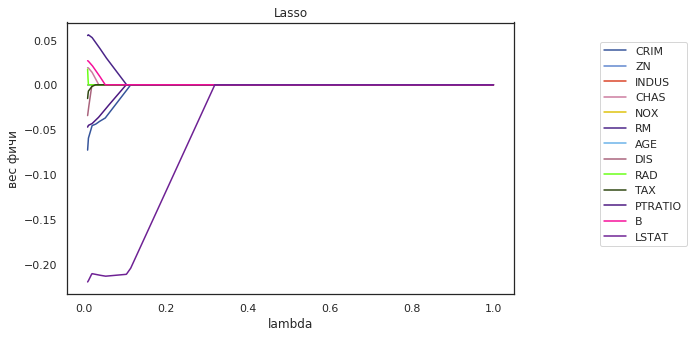

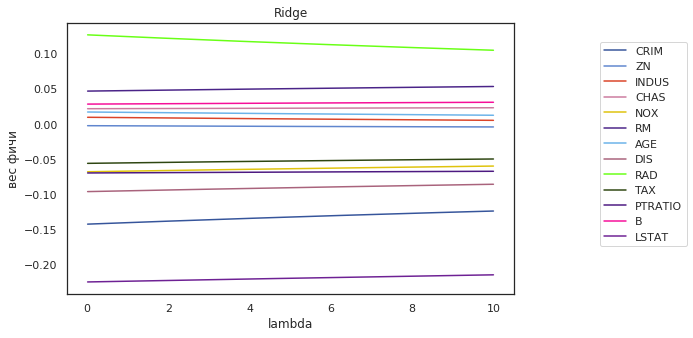

In [55]:
alphas_lasso = np.arange(0.01, 1, 0.001)
alphas_ridge = np.arange(0.01, 10, 0.001)

coefs_lasso = np.zeros((alphas_lasso.shape[0], X_scale_df.shape[1]))
coefs_ridge = np.zeros((alphas_ridge.shape[0], X_scale_df.shape[1]))

for i, a in enumerate(alphas_lasso):
    
    regrL = Lasso(alpha=a)
    regrL.fit(X_scale_df, y)
    weights=regrL.coef_
    for j, weight in enumerate(weights):
        coefs_lasso[i,j]=weight
        
for i, a in enumerate(alphas_ridge):
    
    regrR = Ridge(alpha=a)
    regrR.fit(X_scale_df, y)
    weights=regrR.coef_
    
    for j, weight in enumerate(weights):
        coefs_ridge[i,j]=weight
        
plt.figure(figsize=(8, 5))

colors=[]
for feature in X_scale_df.columns:
    colors.append(np.random.rand(3))

for coef, feature, color in zip(coefs_lasso.T, X_scale_df.columns, colors):
    plt.plot(alphas_lasso, coef, label=feature, color=color)
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("lambda")
plt.ylabel("вес фичи")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature, color in zip(coefs_ridge.T, X_scale_df.columns,colors):
    plt.plot(alphas_ridge, coef, label=feature, color=color)
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("lambda")
plt.ylabel("вес фичи")
plt.title("Ridge")

## линейная регрессия без регуляризации

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size=0.25, random_state=42)

In [59]:
from sklearn.metrics import mean_squared_error, make_scorer

In [77]:
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

RMSE на тренировочном множестве : 0.17719894290954302
RMSE на тестовом множестве : 0.2015959200923446


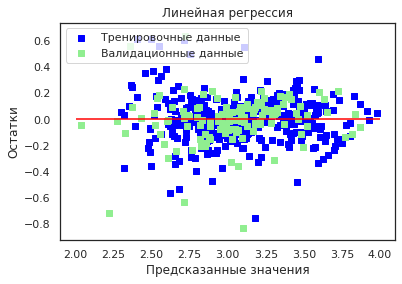

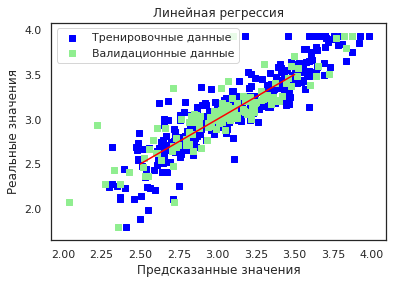

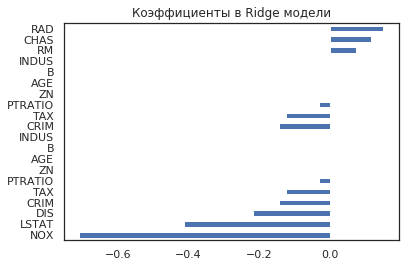

In [81]:
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
lr.fit(X_train, y_train)

print("RMSE на тренировочном множестве :", rmse_cv_train(lr).mean())
print("RMSE на тестовом множестве :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Тренировочные данные")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Валидационные данные")
plt.title("Линейная регрессия")
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 2, xmax = 4, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Тренировочные данные")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Валидационные данные")
plt.title("Линейная регрессия")
plt.xlabel("Предсказанные значения")
plt.ylabel("Реальные значения")
plt.legend(loc = "upper left")
plt.plot([2.5, 3.5], [2.5, 3.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(lr.coef_, index = X_train.columns)
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Коэффициенты в Ridge модели")
plt.show()

## с Ridge регуляризацией

Лучшая lambda : 0.06
Попробуем ещё раз с lambda центрированной вокруг 0.06
Лучшая lambda : 0.036
Ridge RMSE на тренировочном множества : 0.1772170709425357
Ridge RMSE на тестовом множестве : 0.19655728968395816


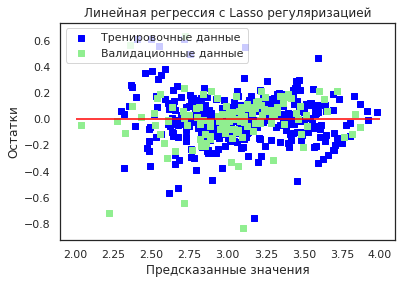

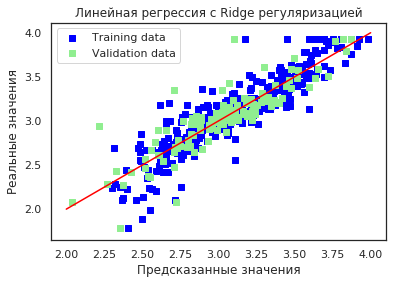

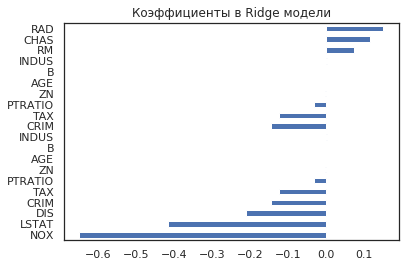

In [82]:
# для фильтрация wargninig
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import RidgeCV

# 2* Ridge
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Лучшая lambda :", alpha)

print("Попробуем ещё раз с lambda центрированной вокруг " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Лучшая lambda :", alpha)

print("Ridge RMSE на тренировочном множества :", rmse_cv_train(ridge).mean())
print("Ridge RMSE на тестовом множестве :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Тренировочные данные")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Валидационные данные")
plt.title("Линейная регрессия с Lasso регуляризацией")
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 2, xmax = 4, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Линейная регрессия с Ridge регуляризацией")
plt.xlabel("Предсказанные значения")
plt.ylabel("Реальные значения")
plt.legend(loc = "upper left")
plt.plot([2, 4], [2, 4], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Коэффициенты в Ridge модели")
plt.show()

## Lasso

Лучшая lambda : 0.0001
Попробуем ещё раз с lambda центрированной вокруг 0.0001
Лучшая lambda : 6e-05
Lasso RMSE на тренировочном множестве : 0.17721116729125247
Lasso RMSE на тестовом множестве : 0.20192587954146496


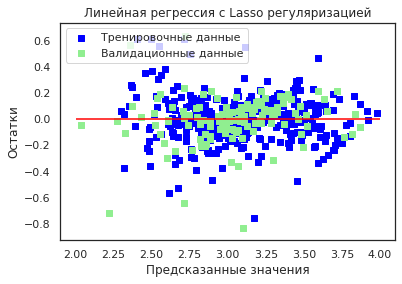

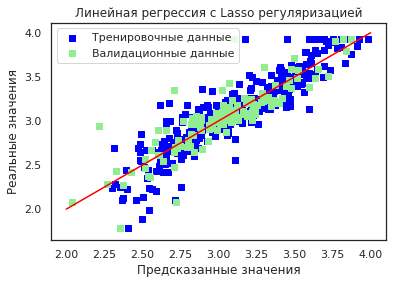

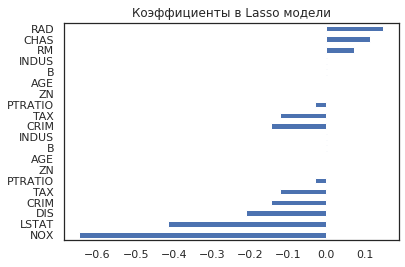

In [83]:
# 3* Lasso
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Лучшая lambda :", alpha)

print("Попробуем ещё раз с lambda центрированной вокруг " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Лучшая lambda :", alpha)

print("Lasso RMSE на тренировочном множестве :", rmse_cv_train(lasso).mean())
print("Lasso RMSE на тестовом множестве :", rmse_cv_test(lasso).mean())
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

# Нарисуем остатки
plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "s", label = "Тренировочные данные")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Валидационные данные")
plt.title("Линейная регрессия с Lasso регуляризацией")
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 2, xmax = 4, color = "red")
plt.show()

# Нарисуем предсказание
plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Тренировочные данные")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Валидационные данные")
plt.title("Линейная регрессия с Lasso регуляризацией")
plt.xlabel("Предсказанные значения")
plt.ylabel("Реальные значения")
plt.legend(loc = "upper left")
plt.plot([2, 4], [2, 4], c = "red")
plt.show()

# Отрисуем важность признаков
coefs = pd.Series(lasso.coef_, index = X_train.columns)
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Коэффициенты в Lasso модели")
plt.show()

## теперь можно оконачально провести сравнение моделей

#### LinearRegression:

In [91]:
lr = LinearRegression()
lr.fit(X_train, y_train)

for feature, coeff in zip(X_scale_df.columns,lr.coef_.T):
    print(feature, coeff)

train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

print("LR train score:", train_score)
print("LR test score:", test_score)

print(f"CV MSE на тренировочном сете: {np.mean(rmse_cv_train(lr))}")
print(f"CV MSE на тестовом сете: {np.mean(rmse_cv_test(lr))}")

CRIM -0.1441172885574309
ZN -0.002021764200348912
INDUS 0.0023319240977890993
CHAS 0.11626116056418179
NOX -0.7094578672639889
RM 0.07238389904455161
AGE 0.00019014832753971587
DIS -0.21613999102442205
RAD 0.151214356287574
TAX -0.12286204891439348
PTRATIO -0.031174413553237863
B 0.00043874234171099635
LSTAT -0.41400972489854043
LR train score: 0.8060263653875208
LR test score: 0.7590009481605038
CV MSE на тренировочном сете: 0.17719894290954302
CV MSE на тестовом сете: 0.2015959200923446


#### Ridge:
Рассмотрим метод для двух значений параметра $\alpha$: 0.1 и 100.

In [92]:
best_ridge_alpha = 0.06
rr = Ridge(alpha=best_ridge_alpha) 
rr.fit(X_train, y_train)

for feature, coeff in zip(X_scale_df.columns,rr.coef_.T):
    print(feature, coeff)
R_train_score = rr.score(X_train,y_train)
R_test_score = rr.score(X_test, y_test)
print (f"Ridge train score alpha = {best_ridge_alpha}:", R_train_score)
print (f"Ridge test score alpha = {best_ridge_alpha}:", R_test_score)

print(f"CV MSE на тренировочном сете: {np.mean(rmse_cv_train(rr))}")
print(f"CV MSE на тестовом сете: {np.mean(rmse_cv_test(rr))}")

CRIM -0.1445235263875404
ZN -0.0018690282819655477
INDUS 0.0021279680775423276
CHAS 0.11447579574968646
NOX -0.6153972462275987
RM 0.07265171320879261
AGE 0.00015404738986263768
DIS -0.2092569994262011
RAD 0.15002254756935662
TAX -0.12396241382241453
PTRATIO -0.030615221725613293
B 0.00044064111856599917
LSTAT -0.4149899705084249
Ridge train score alpha = 0.06: 0.8059651671891314
Ridge test score alpha = 0.06: 0.7575657923463336
CV MSE на тренировочном сете: 0.177215567572166
CV MSE на тестовом сете: 0.19688415140786963


## ради интереса возьмём достаточно большую $\lambda$

In [94]:
rr100 = Ridge(alpha=100)
rr100.fit(X_train, y_train)

for feature, coeff in zip(X_scale_df.columns,rr100.coef_.T):
    print(feature, coeff)
R_train_score100 = rr100.score(X_train,y_train)
R_test_score100 = rr100.score(X_test, y_test)
print ("Ridge train score alpha = 100:", R_train_score100)
print ("Ridge test score alpha = 100:", R_test_score100)

print(f"CV MSE на тренировочном сете: {np.mean(rmse_cv_train(rr100))}")
print(f"CV MSE на тестовом сете: {np.mean(rmse_cv_test(rr100))}")

CRIM -0.06676837928216892
ZN -0.011009780943399543
INDUS -0.003841410897748977
CHAS 0.024922763050129252
NOX -0.00384626491166439
RM 0.12131338434810635
AGE -0.0011137910226688803
DIS -0.023347100340083773
RAD 0.018821387440493106
TAX -0.018617536097932548
PTRATIO -0.0379299615415436
B 0.0007264270559278477
LSTAT -0.1547372681614359
Ridge train score alpha = 100: 0.7147516651071656
Ridge test score alpha = 100: 0.672242005917766
CV MSE на тренировочном сете: 0.2143733268515935
CV MSE на тестовом сете: 0.23840038938502767


Рассмотрим значения коэффиентов для рассмотренных случаев на одном рисунке:

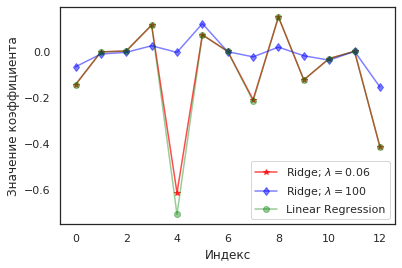

In [95]:
plt.plot(rr.coef_,alpha=0.7,marker='*',color='red',label=r'Ridge; $\lambda = {}$'.format(best_ridge_alpha))
plt.plot(rr100.coef_,alpha=0.5,marker='d',color='blue',label=r'Ridge; $\lambda = 100$')
plt.plot(lr.coef_,alpha=0.4,marker='o',color='green',label='Linear Regression')
plt.xlabel('Индекс')
plt.ylabel('Значение коэффициента')
plt.legend()
plt.show()

Из рисунка видно, что для маленького значения $\lambda$ величины коэффициентов у Ridge почти такие же, как у линейной регрессии.   
При большом значении $\lambda$ мы видим, что для коэффициентов с индексом 3,4,5 коэффициенты значительно меньше по сравнению со случаем линейной регрессии.   
Это пример как раз демонстрирует пример уменьшения значений коэффициентов с использованием Ridge регрессии.

#### Lasso:  $\lambda = 1$

In [99]:
lasso = Lasso(alpha=1)
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

print ("Lasso training score:", train_score)
print ("Lasso test score: ", test_score)
print ("Количество используемых переменных: ", coeff_used)

print(f"CV MSE на тренировочном сете: {np.mean(rmse_cv_train(lasso))}")
print(f"CV MSE на тестовом сете: {np.mean(rmse_cv_test(lasso))}")

Lasso training score: 0.2562431617175901
Lasso test score:  0.33004773245260455
Количество используемых переменных:  2
CV MSE на тренировочном сете: 0.3384658792156344
CV MSE на тестовом сете: 0.2965982428288004


Значение по умолчанию для параметра регуляризации в регрессии Lasso равно 1.
При этом видим, что из 13 признаков в наборе данных используются только 2 признака (ненулевое значение коэффициента).

Результаты обучения и теста в этом случае не самые лучшие; делаем вывод, что модель недостаточно подходит для этого набора данных. Постараемся улучшить ситуацию, уменьшив альфа и увеличив количество итераций. 

#### Lasso:  $\lambda = 0.017$

In [105]:
best_lasso = 0.017

lasso1 = Lasso(alpha=best_lasso, max_iter=10e5)
lasso1.fit(X_train,y_train)
train_score1=lasso1.score(X_train,y_train)
test_score1=lasso1.score(X_test,y_test)
coeff_used1 = np.sum(lasso1.coef_!=0)

print ("Lasso training score alpha = 0.01:", train_score1)
print ("Lasso test score alpha = 0.01: ", test_score1)
print ("Количество используемых переменных:", coeff_used1)

print(f"CV MSE на тренировочном сете: {np.mean(rmse_cv_train(lasso1))}")
print(f"CV MSE на тестовом сете: {np.mean(rmse_cv_test(lasso1))}")

Lasso training score alpha = 0.01: 0.7622118842156603
Lasso test score alpha = 0.01:  0.6976952617580728
Количество используемых переменных: 6
CV MSE на тренировочном сете: 0.19337701831669526
CV MSE на тестовом сете: 0.22067718392503077


In [108]:
best_lasso = 0.001

lasso2 = Lasso(alpha=best_lasso, max_iter=10e5)
lasso2.fit(X_train,y_train)
train_score1=lasso1.score(X_train,y_train)
test_score1=lasso1.score(X_test,y_test)
coeff_used1 = np.sum(lasso1.coef_!=0)

print ("Lasso training score alpha = 0.01:", train_score1)
print ("Lasso test score alpha = 0.01: ", test_score1)
print ("Количество используемых переменных:", coeff_used1)

print(f"CV MSE на тренировочном сете: {np.mean(rmse_cv_train(lasso2))}")
print(f"CV MSE на тестовом сете: {np.mean(rmse_cv_test(lasso2))}")

Lasso training score alpha = 0.01: 0.7622118842156603
Lasso test score alpha = 0.01:  0.6976952617580728
Количество используемых переменных: 6
CV MSE на тренировочном сете: 0.1788404867431118
CV MSE на тестовом сете: 0.19879186809041355


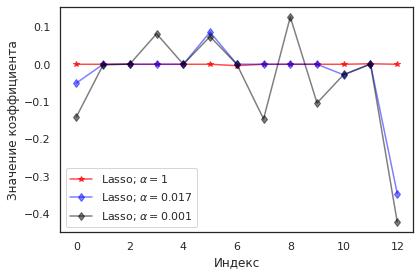

In [109]:
plt.plot(lasso.coef_,alpha=0.7,marker='*',color='red',label=r'Lasso; $\alpha = 1$') 
plt.plot(lasso1.coef_,alpha=0.5,marker='d',color='blue',label=r'Lasso; $\alpha = 0.017$')
plt.plot(lasso2.coef_,alpha=0.5,marker='d',color='black',label=r'Lasso; $\alpha = 0.001$')

plt.xlabel('Индекс')
plt.ylabel('Значение коэффициента')
plt.legend()
plt.tight_layout()
plt.show()

## LassoCV и RidgeCV.

alpha= 0.0001

Feature:  Weight:
CRIM -0.1439934114183019
ZN -0.0019181039165950358
INDUS 0.0020936673415593824
CHAS 0.11233232449829245
NOX -0.6084524172451538
RM 0.07256252662466703
AGE 0.00016408839314124802
DIS -0.20724527303307108
RAD 0.14851764135044596
TAX -0.12152101730815566
PTRATIO -0.03060133409439761
B 0.00044166860855680384
LSTAT -0.4153514534720266


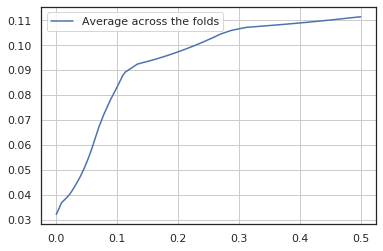

In [113]:
from sklearn.linear_model import LassoCV
alphas = np.arange(0.0001, 0.5, 0.001)

model = LassoCV(alphas=alphas).fit(X_train,y_train)


plt.plot(model.alphas_, model.mse_path_.mean(axis=1), 
         label='Average across the folds')
plt.grid(True)
plt.legend(loc='upper left')

print("lambda=", model.alpha_)

regrL = Lasso(alpha=model.alpha_)

# Train the model using the sets
regrL.fit(X_train,y_train)

# The coefficients
weights=regrL.coef_

print('\nFeature:  Weight:')
      
for feature, coeff in zip(X_scale_df.columns,regrL.coef_.T):
    print(feature, coeff)

In [114]:
from sklearn.linear_model import RidgeCV
alphas = np.arange(0.0001, 0.5, 0.001)
model = RidgeCV(alphas=alphas).fit(X_train,y_train)
print("lambda=", model.alpha_)

regrR = Ridge(alpha=model.alpha_)
regrR.fit(X_train,y_train)
weights=regrR.coef_
print('\nFeature:  Weight:')
for feature, coeff in zip(X_scale_df.columns,regrR.coef_.T):
    print(feature, coeff)

alpha= 0.049100000000000005

Feature:  Weight:
CRIM -0.14446134306709182
ZN -0.0018924080374596198
INDUS 0.0021610121098855645
CHAS 0.11476932096662154
NOX -0.6305933987186794
RM 0.07260298349327958
AGE 0.0001598866217251655
DIS -0.2103823872604307
RAD 0.15022392039726334
TAX -0.12379904453108437
PTRATIO -0.03070494803588883
B 0.00044032103303377567
LSTAT -0.41484364577617655


In [125]:
from sklearn.linear_model import ElasticNetCV, ElasticNet
alphas = np.arange(0.0001, 0.5, 0.001)
model = ElasticNetCV(alphas=alphas).fit(X_train,y_train)
print("lambda=", model.alpha_)

elastic = ElasticNet(alpha=model.alpha_)
elastic.fit(X_train,y_train)
weights=elastic.coef_
print('\nFeature:  Weight:')
for feature, coeff in zip(X_scale_df.columns,elastic.coef_.T):
    print(feature, coeff)

alpha= 0.0001

Feature:  Weight:
CRIM -0.14418697470004352
ZN -0.001920230408351231
INDUS 0.0021470954619259848
CHAS 0.11372386499651073
NOX -0.6286115547426474
RM 0.072557892981863
AGE 0.00016546341619469654
DIS -0.2094768584826788
RAD 0.1494847878334411
TAX -0.12255403826379381
PTRATIO -0.030707262982754
B 0.0004408142286026126
LSTAT -0.41500070720683224


### Посмотрим качество на кросс-валидации для моделей Linear, Lasso, Ridge:

In [127]:
from sklearn.model_selection import train_test_split
lr = LinearRegression()
regrR = Ridge(alpha=0.49)
regrL = Lasso(alpha=0.0001)
elastic = ElasticNet(alpha=0.0001)
lr.fit(X_train, y_train)
regrR.fit(X_train, y_train)
regrL.fit(X_train, y_train)
elastic.fit(X_train, y_train)

ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [129]:
from sklearn.metrics import mean_squared_error
print(f"Linear Regression mean squared error: {mean_squared_error(y_test, lr.predict(X_test))}")
print(f"Lasso Regression mean squared error: {mean_squared_error(y_test, regrL.predict(X_test))}")
print(f"Ridge Regression mean squared error: {mean_squared_error(y_test, regrR.predict(X_test))}")
print(f"ElasticNet Regression mean squared error: {mean_squared_error(y_test, elastic.predict(X_test))}")

Linear Regression mean squared error: 0.032962349673568224
Lasso Regression mean squared error: 0.033193288959042576
Ridge Regression mean squared error: 0.033939313119204534
ElasticNet Regression mean squared error: 0.03313940497070332


In [124]:
# на кросс-валидации
from sklearn.model_selection import cross_val_score
lr_score = cross_val_score(lr, X_scale_df, y, cv=5, scoring='neg_mean_squared_error')
print(f'Linear Regression on cross val score is {-np.mean(lr_score)}+-{np.std(lr_score)}')
regrL_score = cross_val_score(regrL, X_scale_df, y, cv=5, scoring='neg_mean_squared_error')
print(f'Lasso Regression on cross val score is {-np.mean(regrL_score)}+-{np.std(regrL_score)}')
regrR_score = cross_val_score(regrR, X_scale_df, y, cv=5, scoring='neg_mean_squared_error')
print(f'Ridge Regression  on cross val score is {-np.mean(regrR_score)}+-{np.std(regrR_score)}')
elastic_score = cross_val_score(elastic, X_scale_df, y, cv=5, scoring='neg_mean_squared_error')
print(f'Ridge Regression  on cross val score is {-np.mean(regrR_score)}+-{np.std(regrR_score)}')

elastic =..
lars = ...

Linear Regression on cross val score is 0.04561441301852677+-0.030978359047115805
Lasso Regression on cross val score is 0.04551788471935594+-0.031045045485765112
Ridge Regression  on cross val score is 0.04551474529584048+-0.03110671894762389
